# Import Necessary Libraries

In [1]:
# Import Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import VotingClassifier
import pickle

# Data Loading

In [2]:
# Data Loading
df = pd.read_csv('/kaggle/input/crop-recommendation-dataset/Crop_Recommendation.csv')
df.head()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall,Crop
0,90,42,43,20.879744,82.002744,6.502985,202.935536,Rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,Rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,Rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,Rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,Rice


# EDA

In [3]:
# Data Summary
df.describe()

,Nitrogen,Phosphorus,Potassium,Temperature,Humidity,pH_Value,Rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [4]:
# Checking Null Values
df.isnull().sum()

Nitrogen       0
Phosphorus     0
Potassium      0
Temperature    0
Humidity       0
pH_Value       0
Rainfall       0
Crop           0
dtype: int64

In [5]:
# Unique values in Crop
df['Crop'].unique()

array(['Rice', 'Maize', 'ChickPea', 'KidneyBeans', 'PigeonPeas',
       'MothBeans', 'MungBean', 'Blackgram', 'Lentil', 'Pomegranate',
       'Banana', 'Mango', 'Grapes', 'Watermelon', 'Muskmelon', 'Apple',
       'Orange', 'Papaya', 'Coconut', 'Cotton', 'Jute', 'Coffee'],
      dtype=object)

In [6]:
# Crop Distribution
crop_distribution = df.Crop.value_counts()
crop_distribution

Crop
Rice           100
Maize          100
Jute           100
Cotton         100
Coconut        100
Papaya         100
Orange         100
Apple          100
Muskmelon      100
Watermelon     100
Grapes         100
Mango          100
Banana         100
Pomegranate    100
Lentil         100
Blackgram      100
MungBean       100
MothBeans      100
PigeonPeas     100
KidneyBeans    100
ChickPea       100
Coffee         100
Name: count, dtype: int64

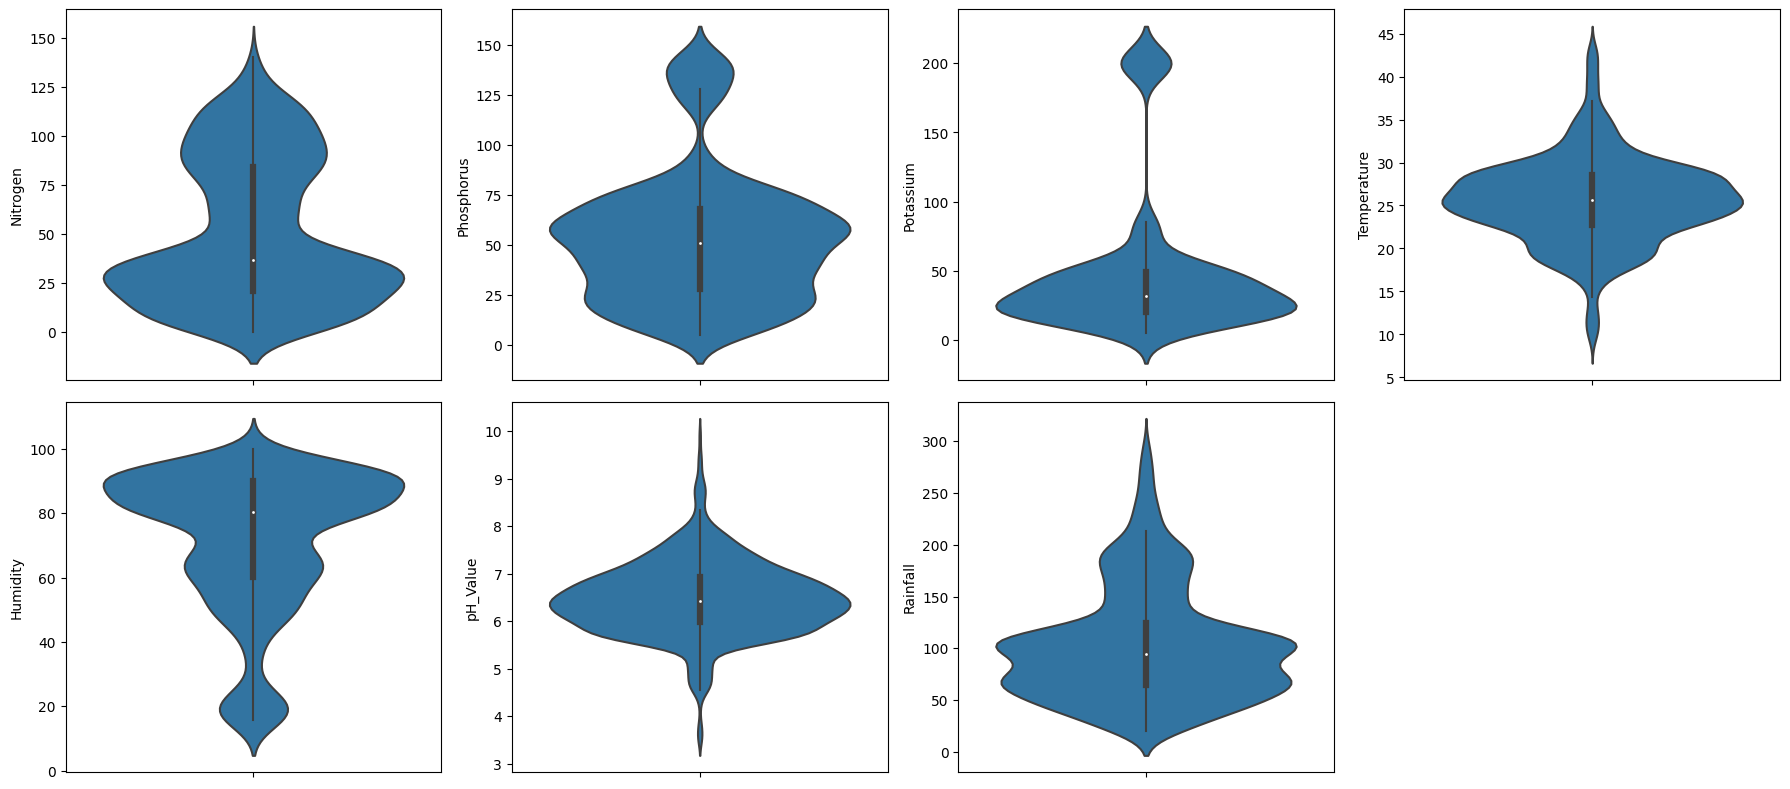

In [7]:
# Violinplot
fig, axes = plt.subplots(nrows = 2,ncols = 4,figsize = (18,8))

sns.violinplot(data = df, y = 'Nitrogen',ax = axes[0,0])
sns.violinplot(data = df, y = 'Phosphorus',ax = axes[0,1])
sns.violinplot(data = df, y = 'Potassium',ax = axes[0,2])
sns.violinplot(data = df, y = 'Temperature',ax = axes[0,3])
sns.violinplot(data = df, y = 'Humidity',ax = axes[1,0])
sns.violinplot(data = df, y = 'pH_Value',ax = axes[1,1])
sns.violinplot(data = df, y = 'Rainfall',ax = axes[1,2])
axes[1,3].axis('off')
plt.tight_layout()

plt.show()

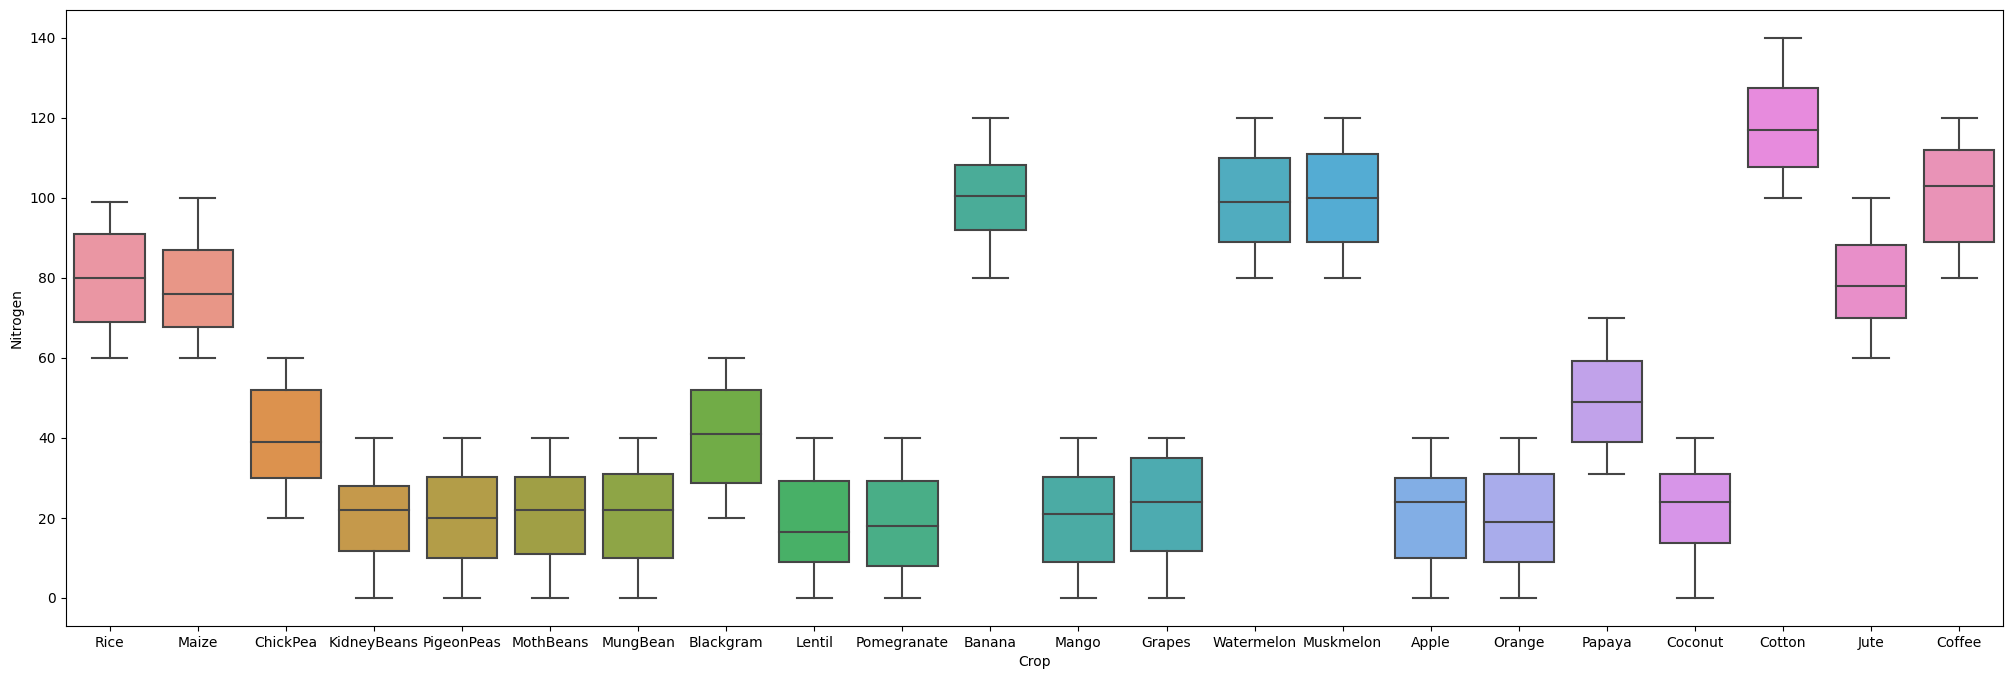

In [8]:
# Boxplot
fig, ax = plt.subplots(figsize=(25,8))
sns.boxplot(data = df, y = 'Nitrogen', x = 'Crop')
plt.show()

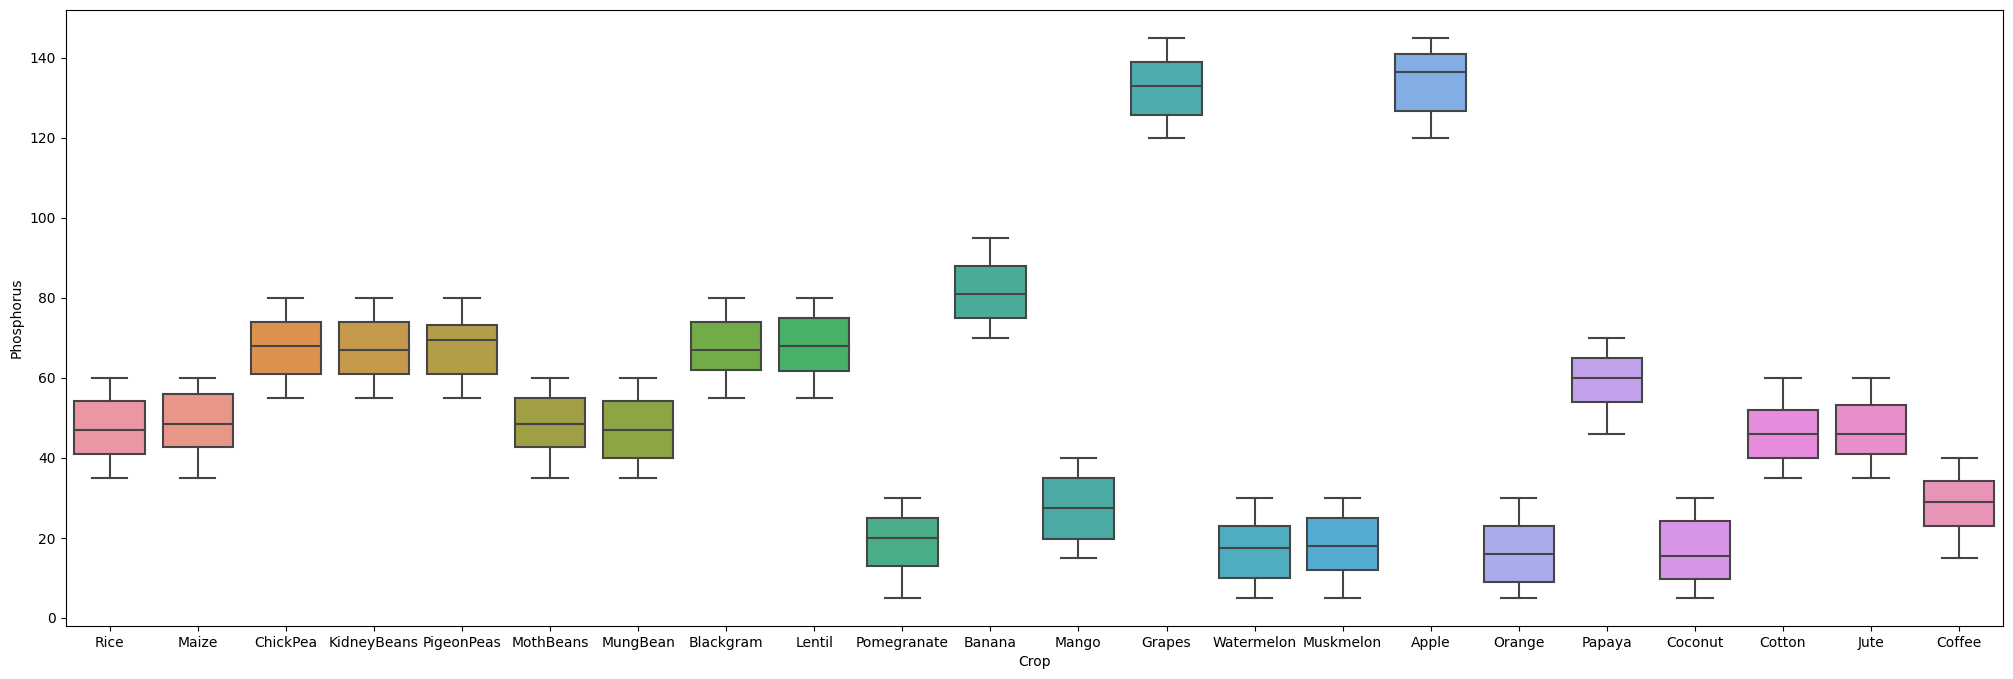

In [9]:
# Boxplot
fig, ax = plt.subplots(figsize=(25,8))
sns.boxplot(data = df, y = 'Phosphorus', x = 'Crop')
plt.show()

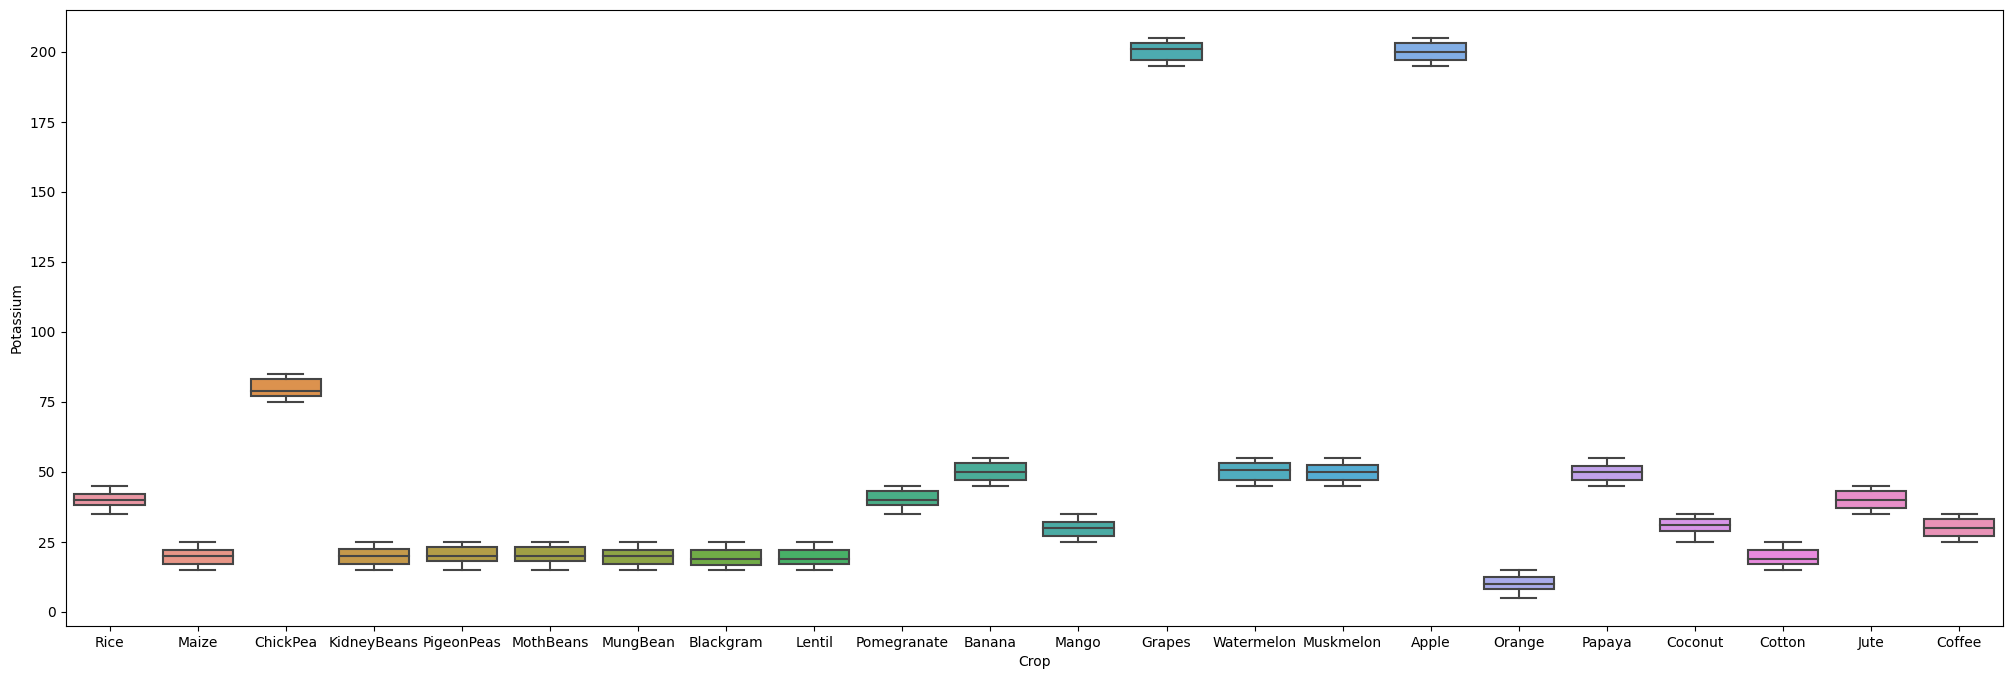

In [10]:
# Boxplot
fig, ax = plt.subplots(figsize=(25,8))
sns.boxplot(data = df, y = 'Potassium', x = 'Crop')
plt.show()

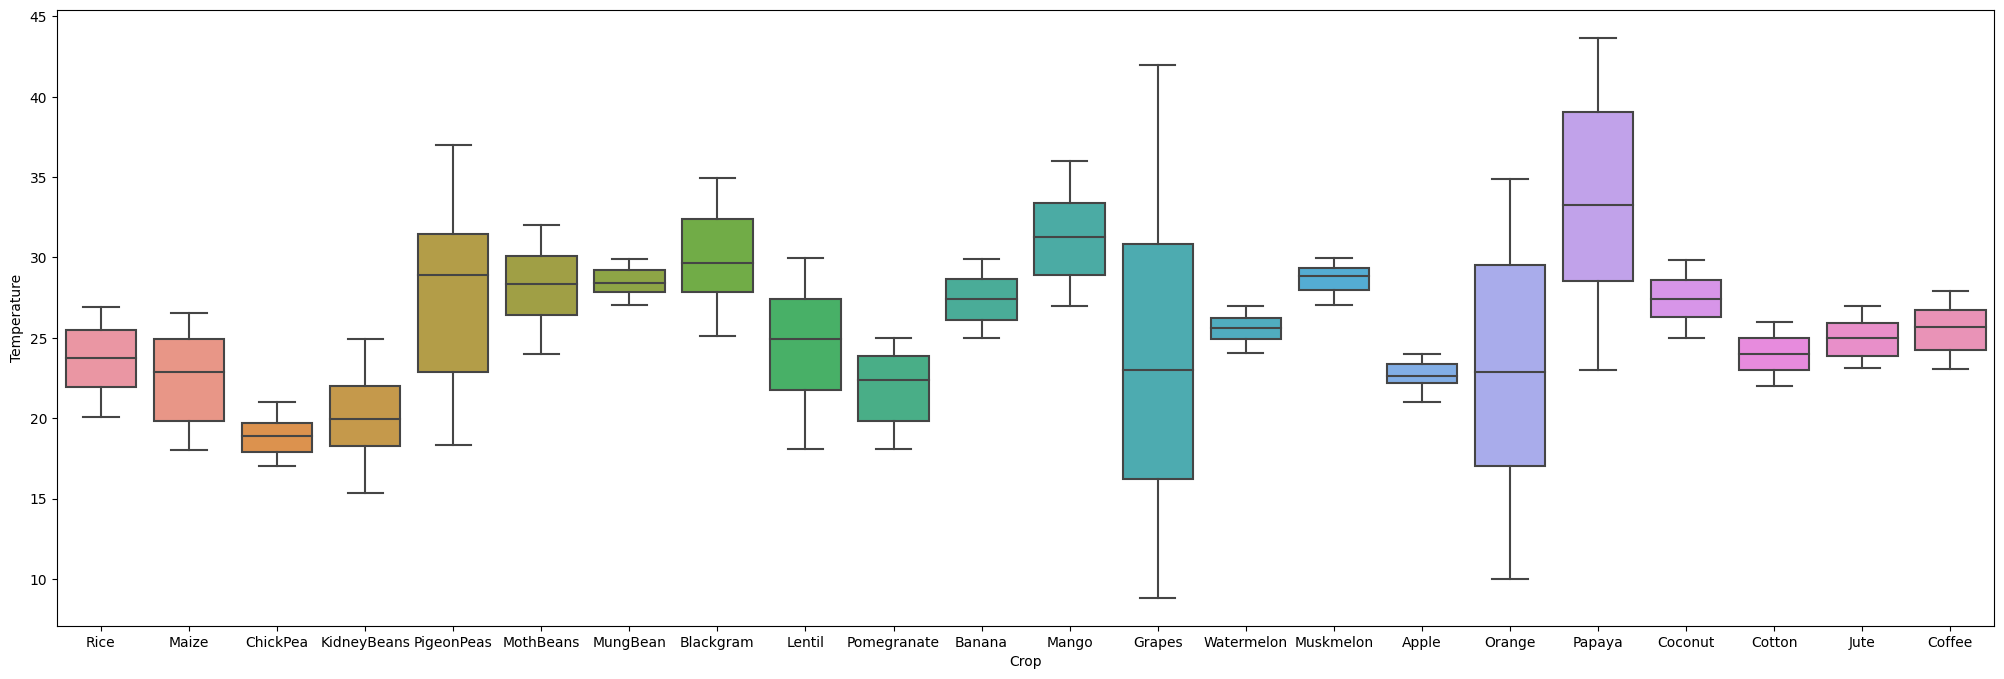

In [11]:
# Boxplot
fig, ax = plt.subplots(figsize=(25,8))
sns.boxplot(data = df, y = 'Temperature', x = 'Crop')
plt.show()

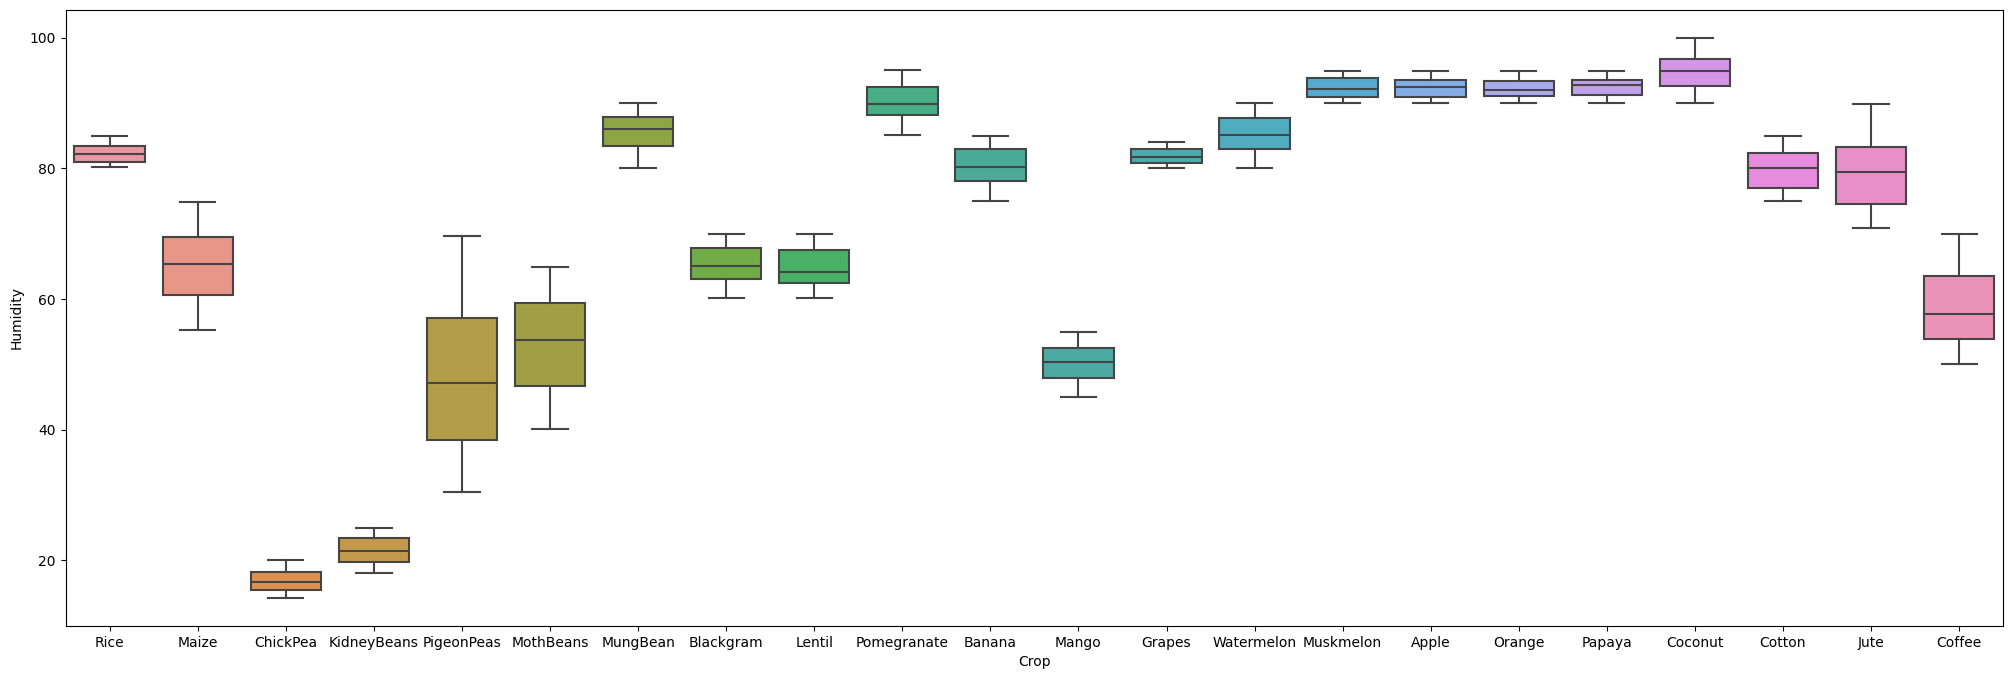

In [12]:
# Boxplot
fig, ax = plt.subplots(figsize=(25,8))
sns.boxplot(data = df, y = 'Humidity', x = 'Crop')
plt.show()

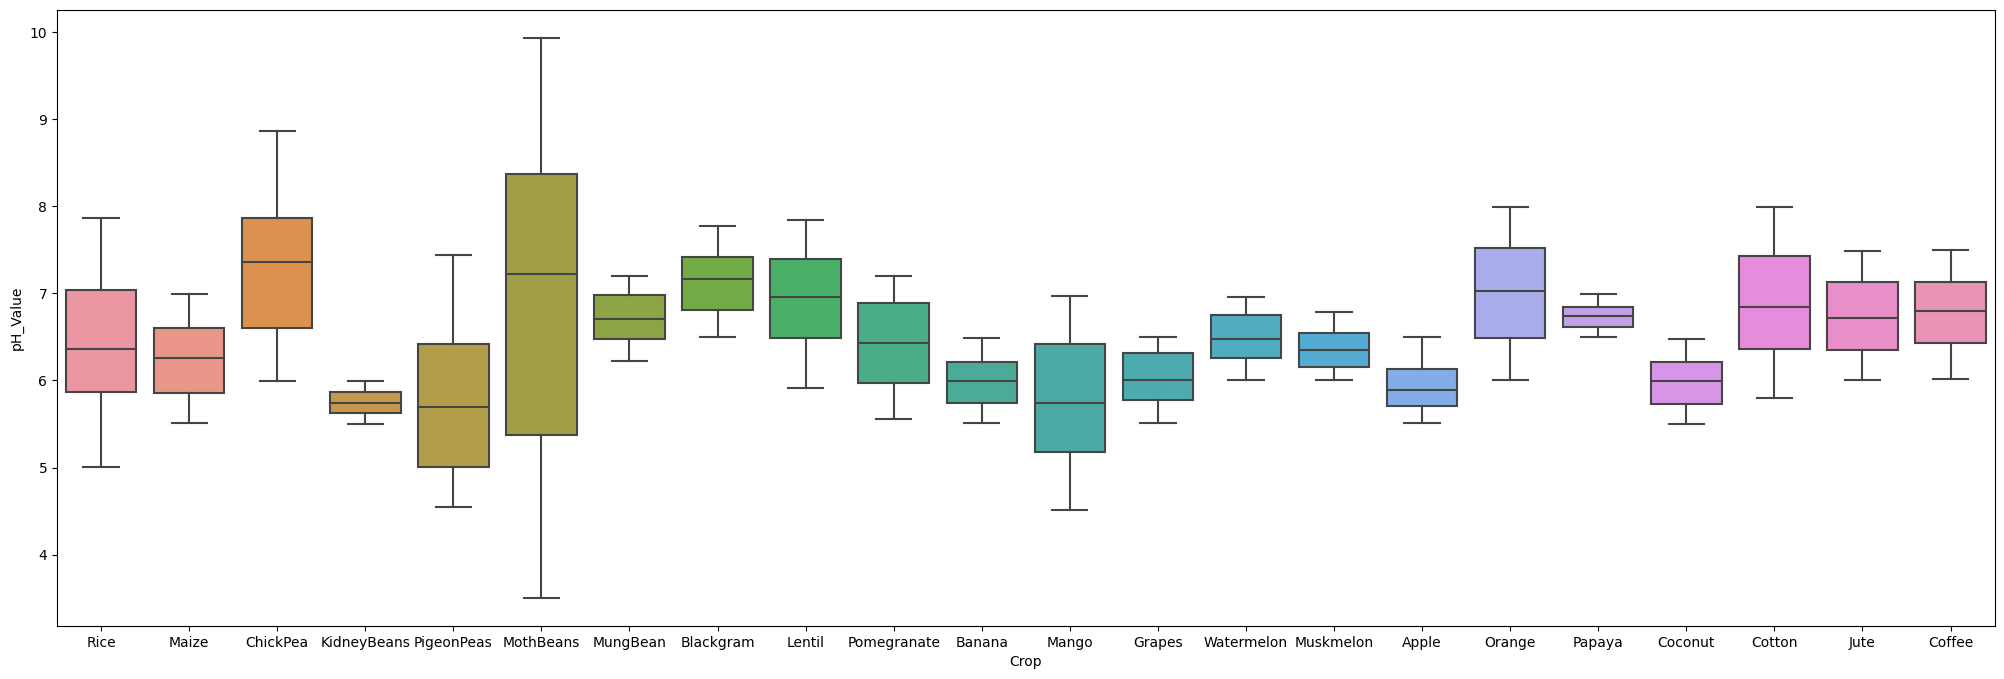

In [13]:
# Boxplot
fig, ax = plt.subplots(figsize=(25,8))
sns.boxplot(data = df, y = 'pH_Value', x = 'Crop')
plt.show()

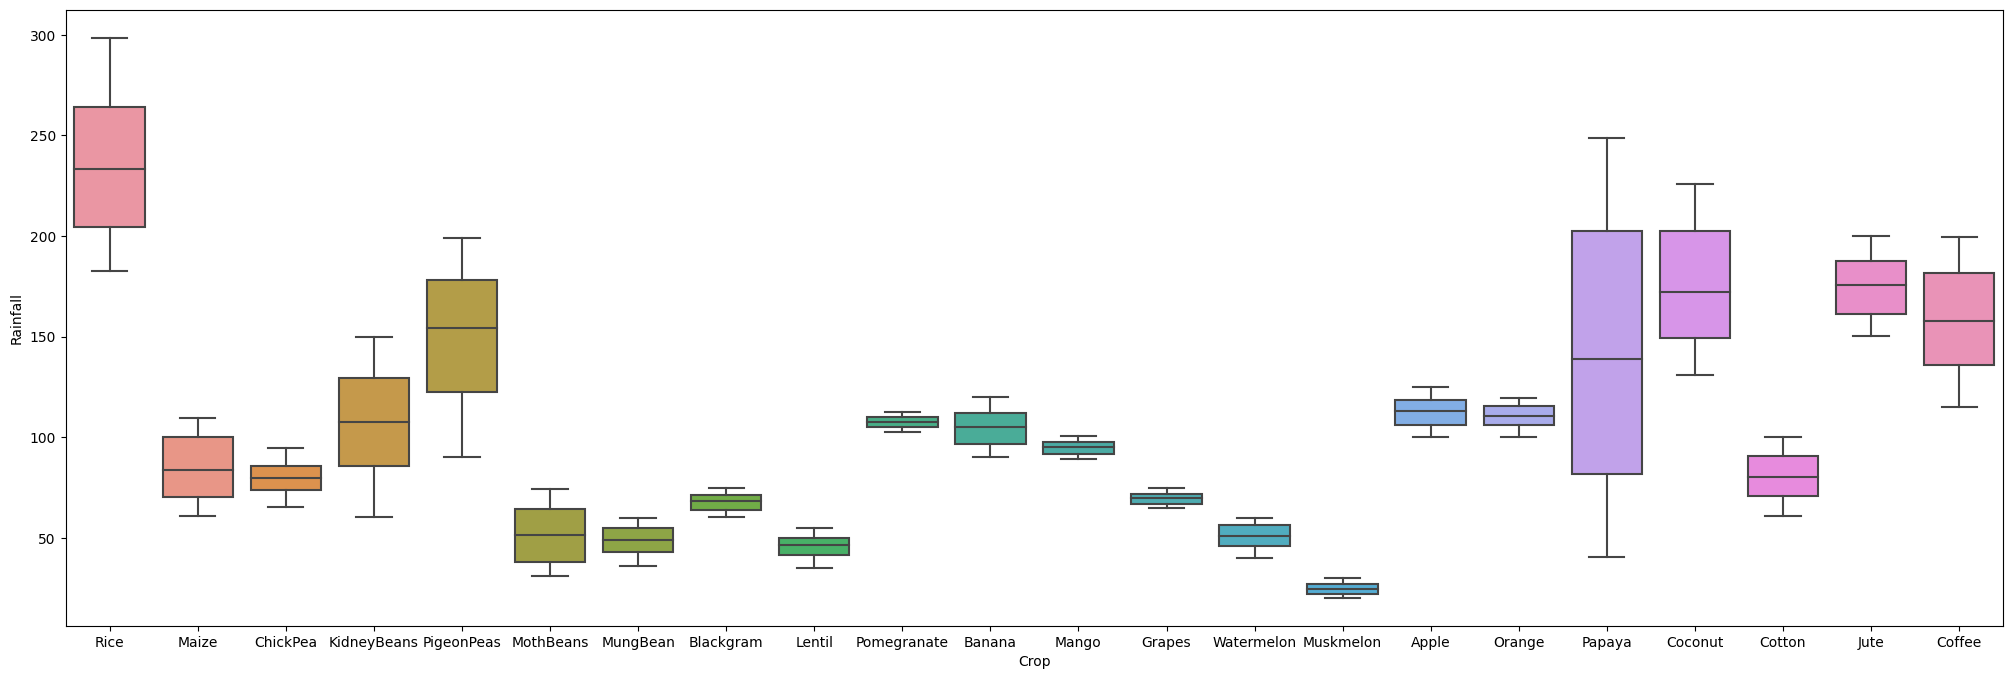

In [14]:
# Boxplot
fig, ax = plt.subplots(figsize=(25,8))
sns.boxplot(data = df, y = 'Rainfall', x = 'Crop')
plt.show()

In [15]:
# Create a dictionary to map each crop to a unique numerical value
crop_mapping = {
    'Rice': 1,
    'Maize': 2,
    'ChickPea': 3,
    'KidneyBeans': 4,
    'PigeonPeas': 5,
    'MothBeans': 6,
    'MungBean': 7,
    'Blackgram': 8,
    'Lentil': 9,
    'Pomegranate': 10,
    'Banana': 11,
    'Mango': 12,
    'Grapes': 13,
    'Watermelon': 14,
    'Muskmelon': 15,
    'Apple': 16,
    'Orange': 17,
    'Papaya': 18,
    'Coconut': 19,
    'Cotton': 20,
    'Jute': 21,
    'Coffee': 22
}

# Apply the mapping to the 'Crop' column
df['Crop'] = df['Crop'].map(crop_mapping)
    
# Split Target and Features
X = df.drop(['Crop'],axis=1)
Y = df['Crop']

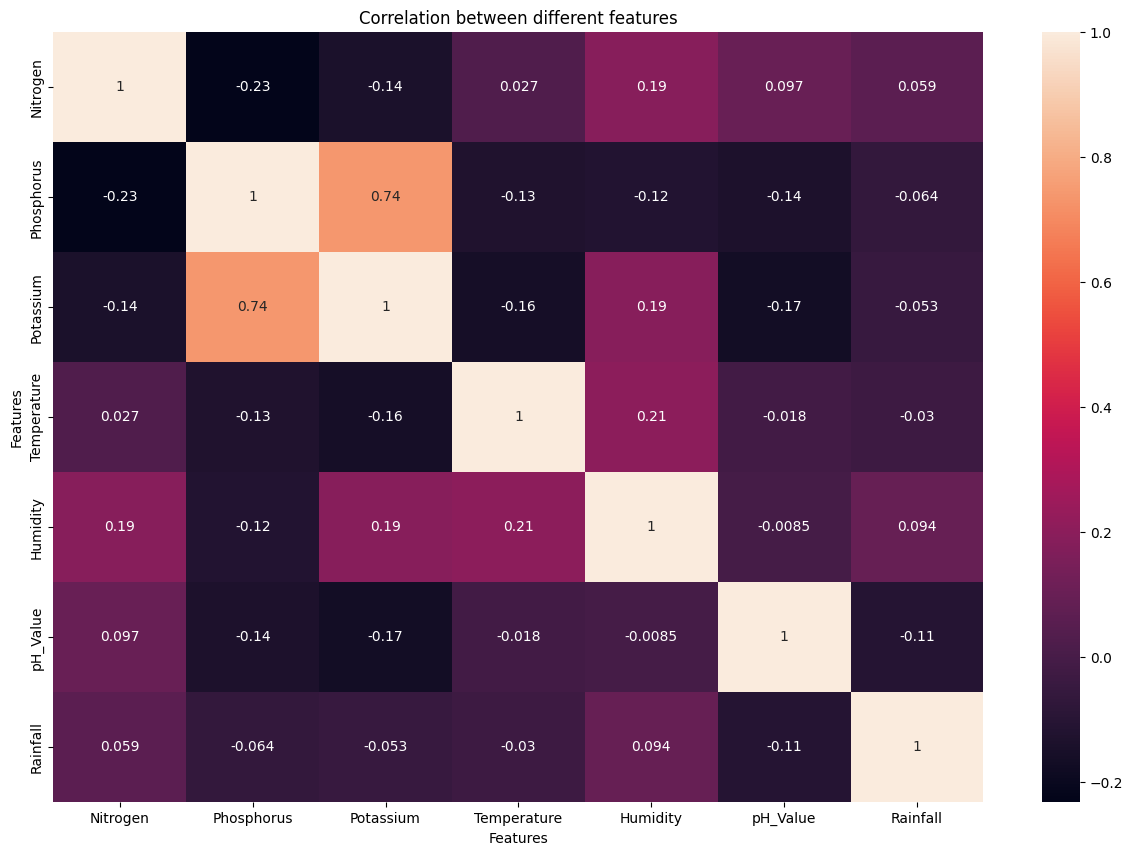

In [16]:
# Correlation Heatmap
fig,ax = plt.subplots(figsize = (15,10))

sns.heatmap(X.corr(),annot = True)

ax.set(xlabel = 'Features')
ax.set(ylabel = 'Features')

plt.title('Correlation between different features')
plt.show()

# Data Modelling

In [17]:
# Train Test Split
from sklearn.model_selection import train_test_split

X_train,X_test, y_train,y_test = train_test_split(X, Y, test_size = 0.2, shuffle = True, random_state = 0)

In [18]:
# Logistic Regression
model_lr = LogisticRegression()
model_lr.fit(X_train,y_train)

y_pred_lr = model_lr.predict(X_test)
acc_lr = accuracy_score(y_pred_lr,y_test)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [19]:
# SVC
model_svc = SVC()
model_svc.fit(X_train,y_train)

y_pred_svc = model_svc.predict(X_test)
acc_svc = accuracy_score(y_pred_svc,y_test)

In [20]:
# Decision Tree
model_dt = DecisionTreeClassifier()
model_dt.fit(X_train,y_train)

y_pred_dt = model_dt.predict(X_test)
acc_dt = accuracy_score(y_pred_dt,y_test)

In [21]:
# Random Forest
model_rf = RandomForestClassifier()
model_rf.fit(X_train,y_train)

y_pred_rf = model_rf.predict(X_test)
acc_rf = accuracy_score(y_pred_rf,y_test)

In [22]:
print("The accuracy for Logistic Regression is : {0:0.4f}".format(acc_lr))
print("The accuracy for Support Vector Machine is : {0:0.4f}".format(acc_svc))
print("The accuracy for Decision Tree is : {0:0.4f}".format(acc_dt))
print("The accuracy for Random Forest is : {0:0.4f}".format(acc_rf))

The accuracy for Logistic Regression is : 0.9682
The accuracy for Support Vector Machine is : 0.9773
The accuracy for Decision Tree is : 0.9955
The accuracy for Random Forest is : 0.9955


In [23]:
# Voting Classifier

# Create instances of the top classifiers
model_svc = SVC(probability=True)  # Set probability=True for VotingClassifier
model_dt = DecisionTreeClassifier()
model_rf = RandomForestClassifier()

# Combine the top 3 classifiers into a voting classifier
voting_clf = VotingClassifier(
    estimators=[('svc', model_svc), ('dt', model_dt), ('rf', model_rf)],
    voting='soft'  # Use 'soft' voting to consider predicted probabilities
)

# Train the voting classifier on the training data
voting_clf.fit(X_train, y_train)

# Make predictions using the voting classifier
y_pred_voting = voting_clf.predict(X_test)

# Calculate the accuracy of the voting classifier
acc_voting = accuracy_score(y_pred_voting, y_test)

# Print the accuracy of the voting classifier
print("The accuracy for Voting Classifier (Top 3) is : {0:0.4f}".format(acc_voting))

The accuracy for Voting Classifier (Top 3) is : 0.9955


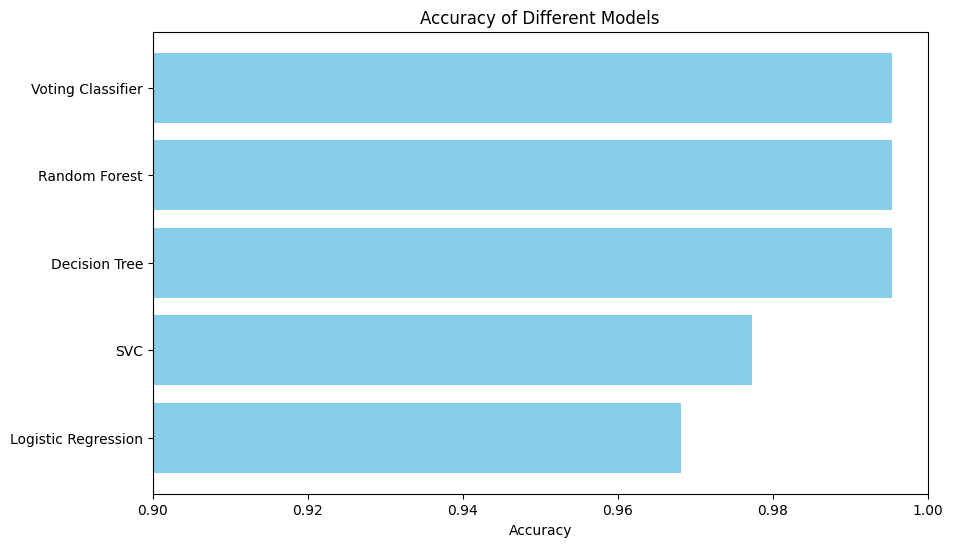

Voting classifier saved as 'voting_classifier.pkl'


In [24]:
# List of accuracies and corresponding model names
accuracies = [acc_lr, acc_svc, acc_dt, acc_rf, acc_voting]
model_names = ['Logistic Regression', 'SVC', 'Decision Tree', 'Random Forest', 'Voting Classifier']

# Plotting accuracies
plt.figure(figsize=(10, 6))
plt.barh(model_names, accuracies, color='skyblue')
plt.xlabel('Accuracy')
plt.title('Accuracy of Different Models')
plt.xlim(0.9, 1)  # Setting the x-axis limit for better visualization
plt.show()

# Save the VotingClassifier as a pickle object
with open('voting_classifier.pkl', 'wb') as file:
    pickle.dump(voting_clf, file)

print("Voting classifier saved as 'voting_classifier.pkl'")